## Zillow's House Price Estimation

This notebook will contain the Exploratory Data Analysis for the Zillows dataset.. <br>
this is the list of the steps we'd be taking<br>

1. Starting with Importing the libraries and reading the data from the csv
2. EDA on the data
3. In this competition, you are going to predict the logerror for the months in Fall 2017. $$log(error)=log(Zestimate)-log(SalePrice)$$


## Step 1: 
- Importing the dependent libraries
- importing the base data

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import os
from timeit import default_timer as timer # For measuring the performance of the code
from __future__ import division

In [92]:
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')


# Always display all the columns
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

# Setting option to display the full text in the dataframe columns
pd.set_option('display.max_colwidth', -1)

line_width has been deprecated, use display.width instead (currently both are
identical)



In [93]:
filename_train = '../train_2016_v2.csv'
#train_data, train_data_col = get_read_file_func(filename_train)

start = timer()
filename_properties = '../properties_2016.csv'
#properties_data, properties_data_col = get_read_file_func(filename_properties)
end = timer()
print(end - start)   

filename_sample = '../sample_submission.csv'
#sample_data, sample_data_col = get_read_file_func(filename_sample)

9.82284545898e-05


The above try didn't work as np.getfrom text won't work if there are commas within a column values. This blog explins it very well [dssg here](https://dssg.uchicago.edu/2015/12/31/the-greatest-technical-challenge-of-our-day-reading-csvs/)

In [94]:
# importing the datasets
train_data_df = pd.read_csv(filename_train ,quotechar='"',skipinitialspace=True).dropna(how='all')
properties_data_df = pd.read_csv(filename_properties ,quotechar='"',skipinitialspace=True).dropna(how='all')
filename_sample_df = pd.read_csv(filename_sample ,quotechar='"',skipinitialspace=True).dropna(how='all')

- looking at the imported data and getting a descriptive stats of the data
- Determining the datatypes of input variables

In [95]:
train_data_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [96]:
properties_data_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34144442,-118654084,85768,NaN,NaN,NaN,NaN,NaN,010D,269,NaN,60378002.041000,37688,3101,NaN,96337,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2015,9,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34140430,-118625364,4083,NaN,NaN,NaN,NaN,NaN,0109,261,LCA11*,60378001.011002,37688,3101,NaN,96337,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516,2015,27516,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,73026,NaN,NaN,73026,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,33989359,-118394633,63085,NaN,NaN,NaN,NaN,NaN,1200,47,LAC2,60377030.012017,51617,3101,NaN,96095,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,650756,1413387,2015,762631,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0,0,3,7,NaN,NaN,NaN,5068,NaN,NaN,5068,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34148863,-118437206,7521,NaN,NaN,NaN,NaN,NaN,1200,47,LAC2,60371412.023001,12447,3101,27080,96424,0,NaN,NaN,NaN,NaN,NaN,NaN,1948,1,NaN,571346,1156834,2015,585488,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0,0,4,NaN,NaN,NaN,NaN,1776,NaN,NaN,1776,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34194168,-118385816,8512,NaN,NaN,NaN,NaN,NaN,1210,31,LAM1,60371232.052003,12447,3101,46795,96450,0,NaN,NaN,NaN,1,NaN,NaN,1947,NaN,NaN,193796,433491,2015,239695,5725.17,NaN,NaN,NaN


In [97]:
filename_sample_df.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [98]:
# getting the column datatypes
col_datatypes = properties_data_df.dtypes.reset_index()
col = ['colnames', 'data_types']
col_datatypes.columns = col
col_datatypes

,colnames,data_types
0,parcelid,int64
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


In [99]:
# Datatype count of columns
col_datatypes.groupby(['data_types']).count()

,colnames
data_types,
int64,1
float64,52
object,5


So, majority of the columns are int or float.<br>
Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This statistics is generated for the numeric columns only.

In [100]:
properties_data_df[properties_data_df.dtypes[(properties_data_df.dtypes=="float64")\
                                             |(properties_data_df.dtypes=="int64")].index.values].describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2973755.000000,2973767.000000,12629.000000,1938488.000000,2856305.000000,17096,202717.000000,2929652.000000,2709184.000000,7672.000000,190798.000000,202717.000000,22001.000000,2973780.000000,312637.000000,2856305.000000,883267.000000,883267.000000,1806401.000000,2973780.000000,2.973780e+06,2.709118e+06,517534,27960.000000,36939,32075,485459,2973780.000000,2973780.000000,2922372.000000,2973780.000000,1156402.000000,2971237.000000,2973742.000000,1624,311631.000000,6747.000000,1977490.000000,80355.000000,2647.000000,2925289.000000,682069.000000,2.930235e+06,2.942667e+06,2973778.000000,2917484.000000,2953967.000000,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143,3.088949,3.725948,5.784787,2.299263,66,1380.630396,1827.162124,1760.000608,1178.900678,2739.187235,1388.944578,2414.339439,6048.031600,1.168710,2.244165,1.823517,383.769357,4.012053,34001468.653721,-1.182019e+08,2.282281e+04,1,519.710980,1,1,1,260.048429,60483449.616288,34993.350224,2570.460554,193476.407415,96552.672800,1.475018,7,1.010009,5.999555,1.181171,319.803397,278.296562,1964.261641,1.401464,1.708836e+05,4.204790e+05,2014.999459,252478.029469,5377.607139,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754,1.275859,0.501700,1.805352,1.000736,0,632.868543,1819.780469,971.061010,357.073036,5447.428327,664.488709,7695.302952,20.232785,0.461273,0.991205,0.610035,245.443419,3.293733,243381.178314,3.453171e+05,3.375924e+05,0,191.323284,0,0,0,15.908167,200811.675434,50727.465389,788.071140,165713.254317,3673.175038,2.840403,0,0.117709,0.384050,2.447896,233.086314,369.731508,23.441319,0.539076,4.020683e+05,7.263467e+05,0.036832,445013.169618,9183.107128,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,66,3.000000,1.000000,1.000000,120.000000,112.000000,3.000000,117.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,33324388.000000,-1.194758e+08,1.000000e+02,1,19.000000,1,1,1,31.000000,60371011.101000,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7,1.000000,4.000000,1.000000,10.000000,10.000000,1801.000000,1.000000,1.000000e+00,1.000000e+00,2000.000000,1.000000,1.340000,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000,2.000000,3.000000,4.000000,2.000000,66,1012.000000,1213.000000,1196.000000,960.000000,1694.000000,1013.000000,1079.000000,6037.000000,1.000000,2.000000,2.000000,324.000000,2.000000,33827684.750000,-1.183930e+08,5.688000e+03,1,430.000000,1,1,1,261.000000,60373203.006001,12447.000000,2061.000000,46736.000000,96180.000000,0.000000,7,1.000000,6.000000,1.000000,190.000000,96.000000,1950.000000,1.000000,7.480000e+04,1.796750e+05,2015.000000,74836.000000,2461.070000,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000,3.000000,4.000000,7.000000,2.000000,66,1283.000000,1572.000000,1539.000000,1296.000000,2172.000000,1284.000000,1992.000000,6037.000000,1.000000,2.000000,2.000000,441.000000,2.000000,34008249.000000,-1.181725e+08,7.000000e+03,1,495.000000,1,1,1,261

#### Points to note after looking at the above discription:
1. The lat-long of the properties tell us that they are from a very small region in California.
2. A lot of missing values in the properties dataset and this will need a lot of preprocessing for missing value imputation and handeling columns with high sparcity.

**taxvaluedollarcnt = structuretaxvaluedollarcnt + landtaxvaluedollarcnt** - this will reflect in our correlation matrix

**Now looking at the map on how the proprties are located**

In [101]:
# Trying to look at where the properties are located and if we can see any correlation between the location
from mpl_toolkits.basemap import Basemap

In [102]:
geo_loc = properties_data_df.loc[:,('latitude', 'longitude')]
geo_loc = geo_loc.dropna(how = 'any')
geo_loc['lat'] = geo_loc.latitude/1000000
geo_loc['lon'] = geo_loc.longitude/1000000

In [103]:
geo_loc.describe()

,latitude,longitude,lat,lon
count,2973780.000000,2.973780e+06,2973780.000000,2973780.000000
mean,34001468.653721,-1.182019e+08,34.001469,-118.201934
std,243381.178314,3.453171e+05,0.243381,0.345317
min,33324388.000000,-1.194758e+08,33.324388,-119.475780
25%,33827684.750000,-1.183930e+08,33.827685,-118.392983
50%,34008249.000000,-1.181725e+08,34.008249,-118.172540
75%,34161860.000000,-1.179495e+08,34.161860,-117.949468
max,34819650.000000,-1.175543e+08,34.819650,-117.554316


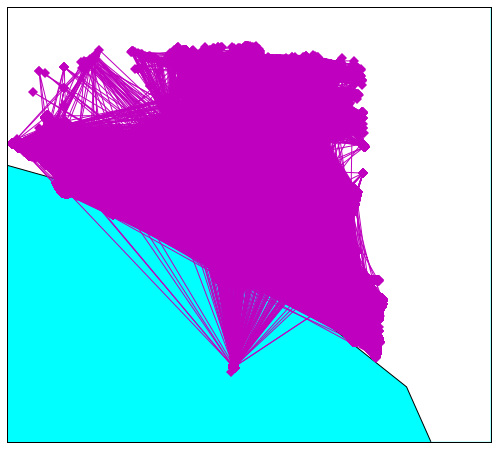

In [104]:
# Dynamically setting the RC parameters
plt.rcParams['agg.path.chunksize'] = 20000
plt.rcParams['figure.figsize'] = 12, 8

map = Basemap(projection='mill'
             , llcrnrlat = 33
             , llcrnrlon = -119.5
             , urcrnrlat = 35
             , urcrnrlon = -117
             )

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

lons = geo_loc.lon.values
lats = geo_loc.lat.values

x, y = map(lons, lats)

map.plot(x, y, marker='D',color='m')

plt.show()

### Before we go further... 
Let us first merge the training data and look at the descriptive stats for that were sold and are part of the training data. That will be our main source for building the model.
1. Merging the datasets
2. Data pre-processing
    - Missing value treatment. This will be a very basic level of missing value imputation as we'd need to do a detailed imputation in the next notebook.
    - Scaling - Not required now but will have to be done later.


In [105]:
df_f1 = pd.merge(train_data_df, properties_data_df, how='left', on=['parcelid'])


df_f1[df_f1.dtypes[(df_f1.dtypes=="float64")\
                   | (df_f1.dtypes=="int64")].index.values].describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16,57364.000000,89093.000000,658,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,90275.000000,9.027500e+04,80125.000000,17901,969.000000,1161,1204,16697,90275.000000,90275.000000,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,89895.000000,90274.000000,90275,90274.000000,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4,5.565407,2.309216,66,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,34005410.693691,-1.181989e+08,29110.164177,1,519.827657,1,1,1,261.832179,60491794.811503,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,180093.393748,457672.627357,2015,278335.325022,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0,1.900602,0.976172,0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,264965.375556,3.606032e+05,121721.308654,0,155.054210,0,0,0,5.182901,205054.867266,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,209129.888169,554884.398943,0,400495.464893,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4,1.000000,1.000000,66,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,33339295.000000,-1.194479e+08,167.000000,1,28.000000,1,1,1,31.000000,60371011.101001,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,100.000000,22.000000,2015,22.000000,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4,4.000000,2.000000,66,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,33811538.500000,-1.184117e+08,5703.000000,1,420.000000,1,1,1,261.000000,60373203.006006,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,81245.000000,199023.250000,2015,82228.000000,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4,7.000000,2.000000,66,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,34021500.000000,-1.181734e+08,7200.000000,1,500.000000,1,1,1,261.000000,60376200.013015,25218.000000,3101.000000,118887.000000,96393.000000,0.000000,7,1.000

In [106]:
geo_loc = df_f1.loc[:,('latitude', 'longitude')]
geo_loc = geo_loc.dropna(how = 'any')
geo_loc['lat'] = geo_loc.latitude/1000000
geo_loc['lon'] = geo_loc.longitude/1000000

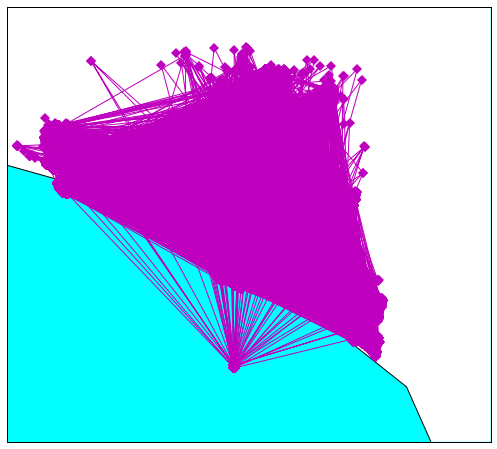

In [107]:
# Dynamically setting the RC parameters
plt.rcParams['agg.path.chunksize'] = 20000
plt.rcParams['figure.figsize'] = 12, 8

map = Basemap(projection='mill'
             , llcrnrlat = 33
             , llcrnrlon = -119.5
             , urcrnrlat = 35
             , urcrnrlon = -117
             )

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
map.drawcoastlines()
map.drawstates()
map.drawcountries(linewidth=1.5)

lons = geo_loc.lon.values
lats = geo_loc.lat.values

x, y = map(lons, lats)

map.plot(x, y, marker='D',color='m')

plt.show()

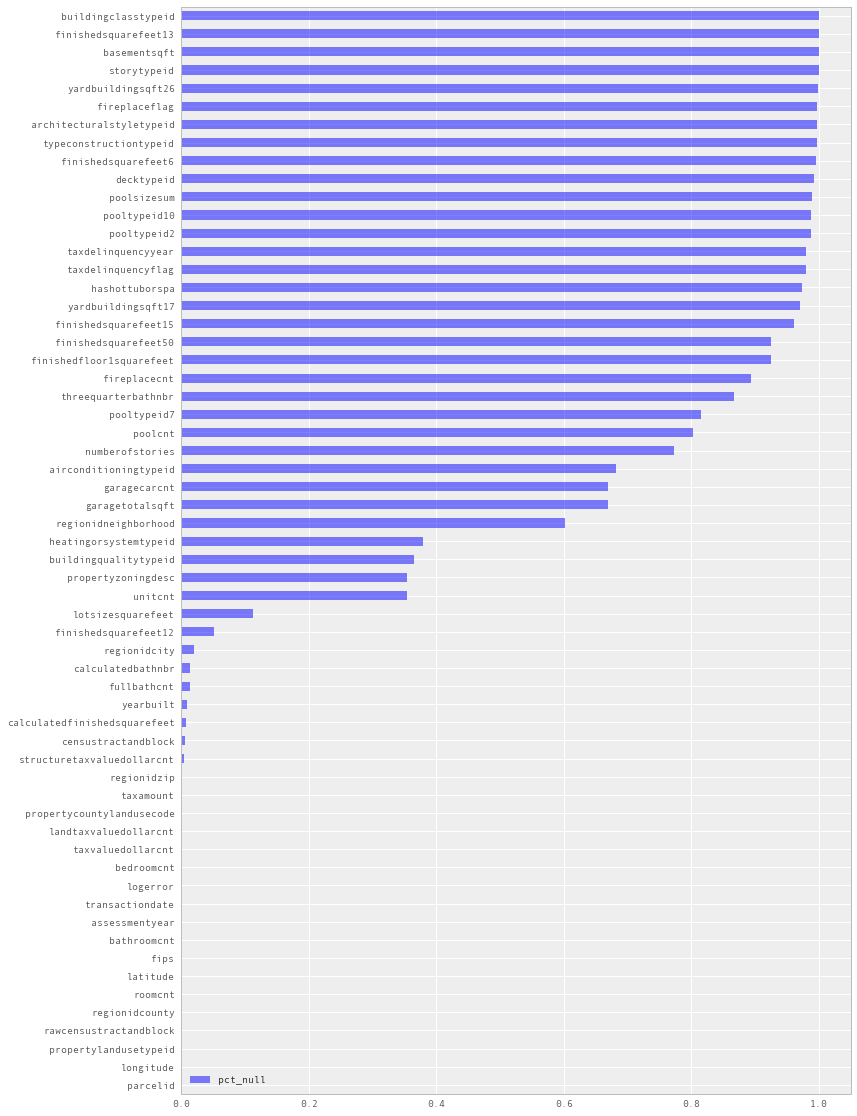

In [108]:
# Getting the percentage of missing values for each of the cloumns
df_null = df_f1.isnull().sum() /df_f1.index.max()
df_null = df_null.reset_index()
df_null.columns = ['colnames', 'pct_null']
df_null_sorted = df_null.sort('pct_null')

#plt.figure(figsize=(12, 40))
plt.rcParams['figure.figsize'] = 12, 20
ax = df_null_sorted.plot(kind = 'barh', alpha= 0.5)
ax.set_yticklabels(list(df_null_sorted.colnames))
plt.show()

In [18]:
# filtering for the numeric 
df_f2 = df_f1.drop(['parcelid','transactiondate', 'latitude', 'longitude','censustractandblock', 'taxdelinquencyflag',\
                       'fireplaceflag','propertyzoningdesc','propertycountylandusecode', 'hashottuborspa'\
                     ], axis = 1)


Based on the information from the above describe table:<br>
Lets further drop the columns with:
1. less than 50% of the total datapoints(90275*0.5)
2. The id's and type id's will little or no information. For example pooltypeid10, pooltypeid2, etc had only 1 value and hence doesn't give any new information. (subjective for now)
<br>
Columns that will be dropped are:<br>



and do a <br>
One-Hot encoding for the type id's - now that I thik of it... I dont think we need it.

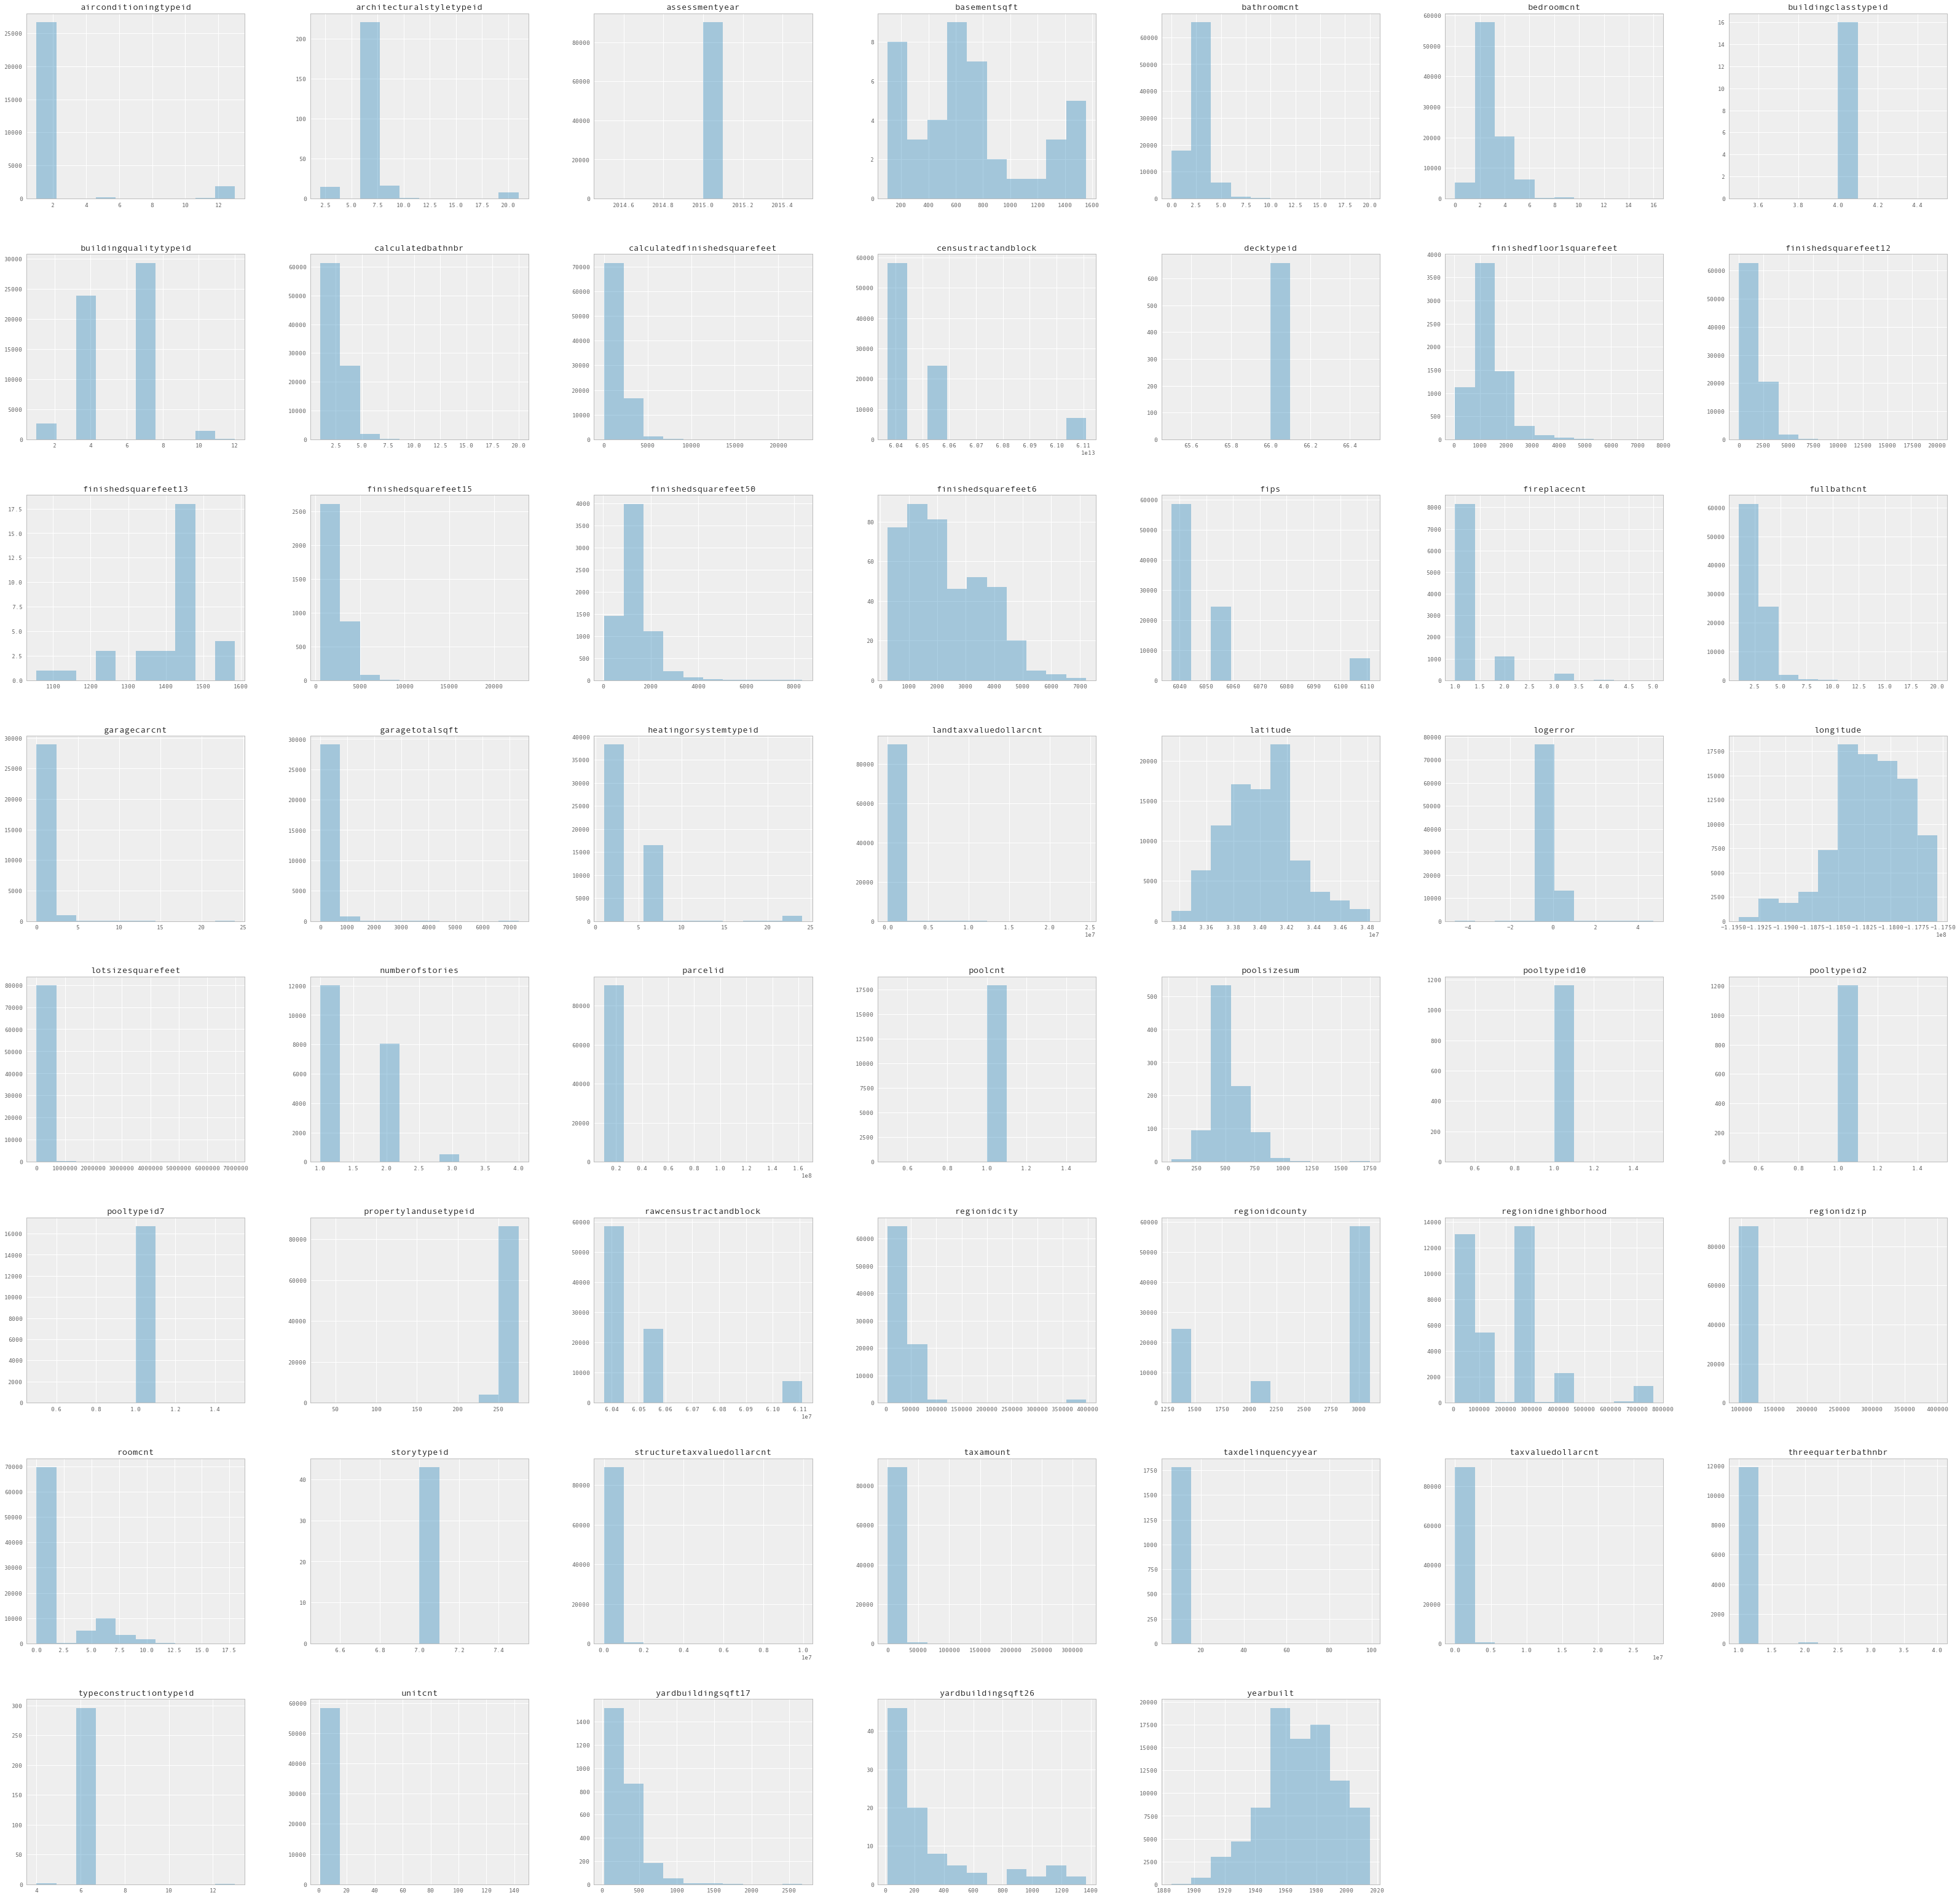

In [109]:
# This will plot the histogram for all the numeric variable - Categorical and Numeric
df_f1[df_f1.dtypes[(df_f1.dtypes=="float64")|(df_f1.dtypes=="int64")]
                        .index.values].hist(figsize=[56,56], alpha =0.4)
plt.show()

This shows how skwed the distribution is for each of the values.<br>
Let's look at the distribution of the target variable. 

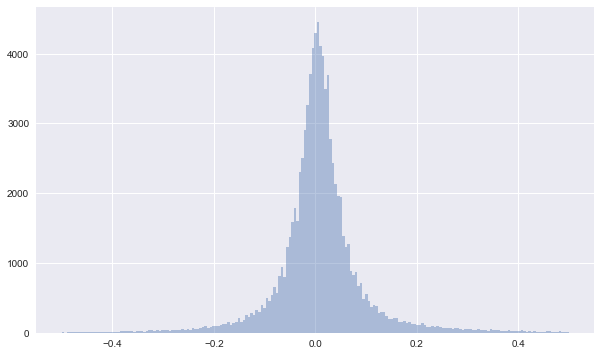

In [71]:
from sklearn import preprocessing

# We see a lot of missing values in the data and hence
# missing value imputation becomes very critical here
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_f2)
missing_imputed = imp.transform(df_f2)
df_missing_imputed = pd.DataFrame(missing_imputed, columns=df_f2.columns)

bins = np.linspace(-0.5, 0.5, 200)
plt.figure(figsize=(10, 6))
plt.hist(df_missing_imputed.filter(['logerror']).values, bins, alpha = 0.4)
plt.show()

- The target variable is normally distributed. This is good!<br>
- Finding the correlation between the input variables and the target variable. <br>
\begin{equation}
Correlation = \frac{Covariance(X,Y)}{SQRT( Var(X)* Var(Y))}
\end{equation}

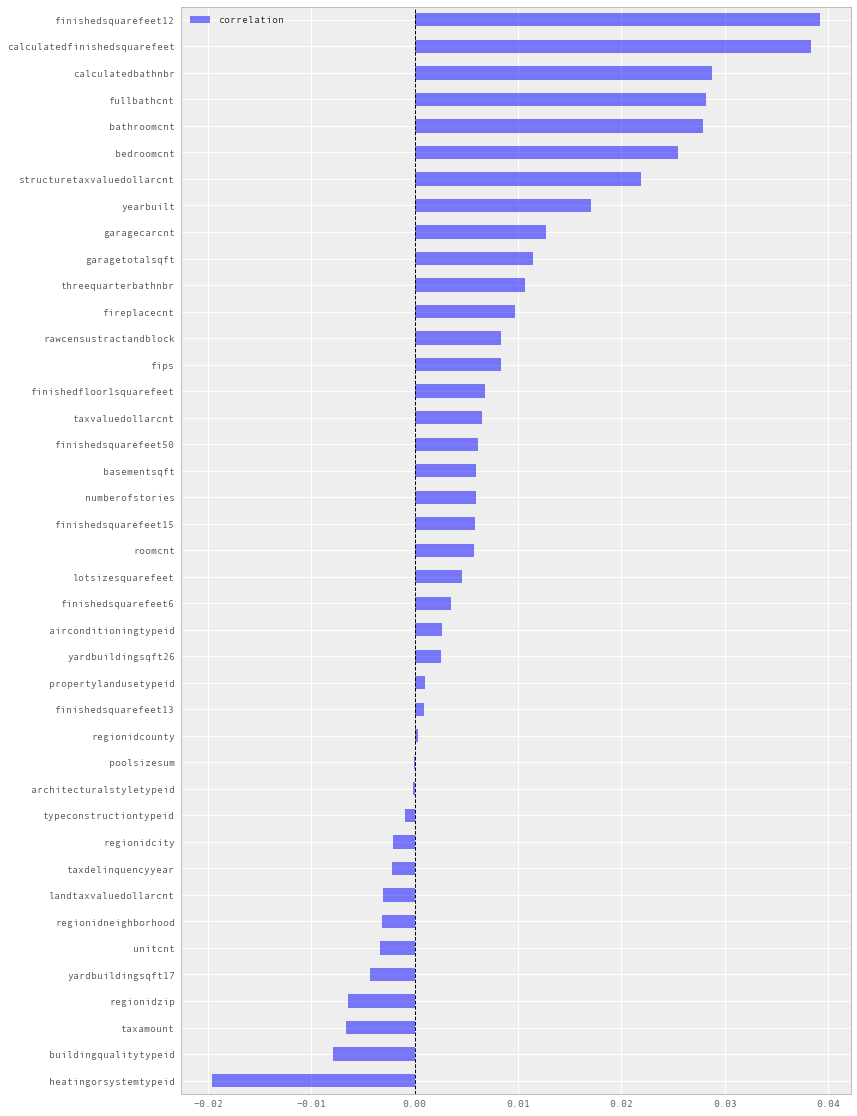

In [110]:
# After filtering out the columns with significant chunk of data. Lets look at the correlation  of 
# individual variable with the target variable
df_corr = df_missing_imputed.corrwith(df_missing_imputed.logerror).reset_index()
df_corr.columns = ['colnames', 'correlation']
df_corr_sorted = df_corr.sort('correlation')
df_corr_sorted = df_corr_sorted.dropna(how='any')
df_corr_sorted = df_corr_sorted[(df_corr_sorted['colnames'] != 'logerror')]

plt.rcParams['figure.figsize'] = 12, 20
plt.figure(figsize=(12, 10))
ax = df_corr_sorted.plot(kind = 'barh', alpha= 0.5)
ax.set_yticklabels(list(df_corr_sorted.colnames))
plt.show()

The correlation between the target variable and X is very low. This will need a lot of featre extraction.

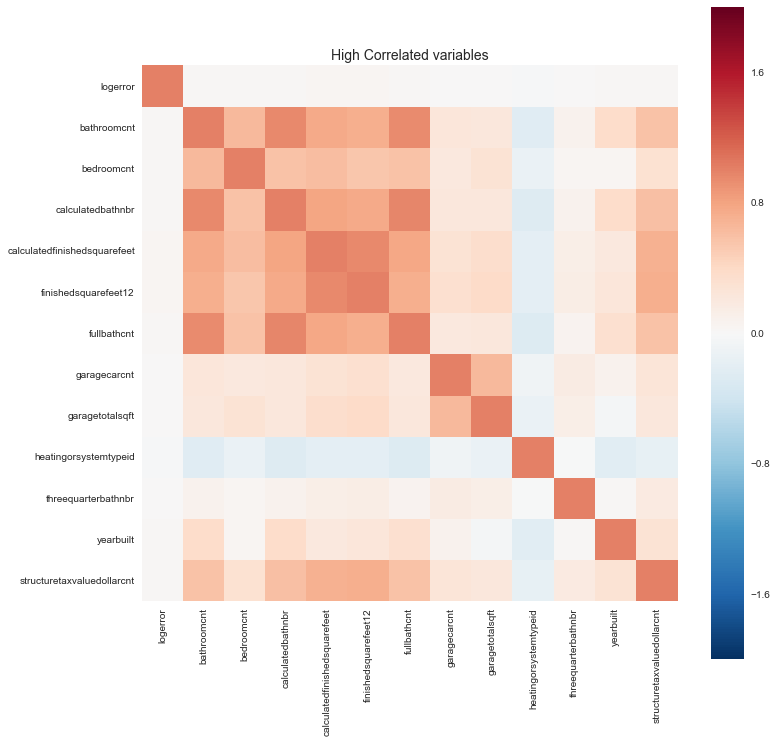

In [52]:
# Checking the correlation between the variables
# But first let's focus on the columns with comparitively higher correlation to the target variable
import seaborn as sns

higher_corr = list(df_corr[(df_corr.correlation>0.01)|(df_corr.correlation < -0.01)].colnames)
df_corr_all = df_missing_imputed[higher_corr].corr()

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(df_corr_all, vmax=2., square=True)
plt.title('High Correlated variables', fontsize=14)
plt.show()

### Checking some individual distribution of variables
This is very much similar to the above set of histograms that we made

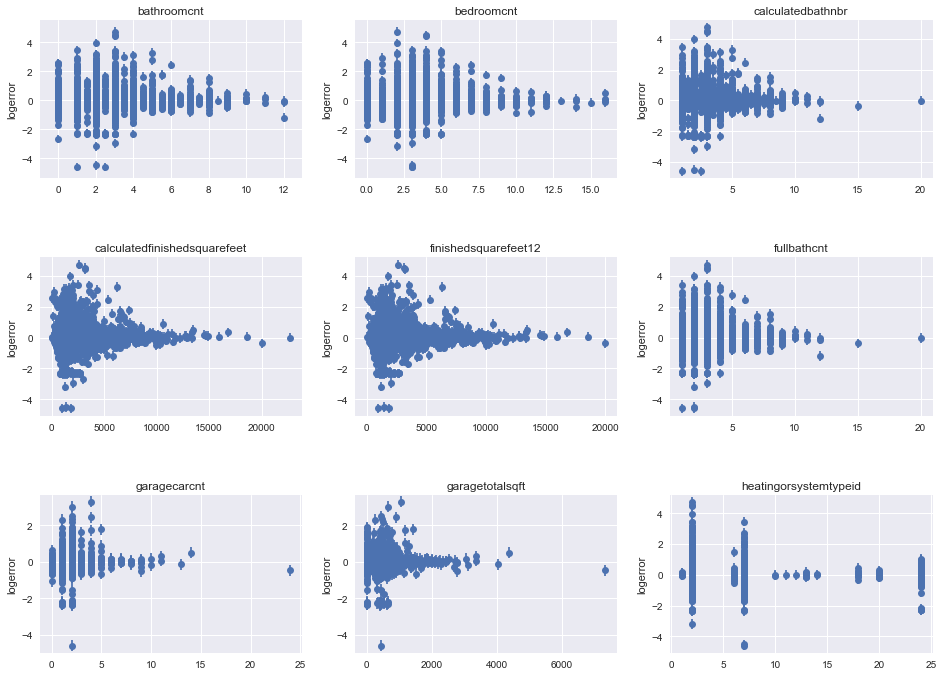

In [90]:
plt.figure(figsize=(16, 16))
y = df_f1.filter(['logerror'])

plt.subplot(431)
x_axis =df_f1.filter(['bathroomcnt'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.xlim(-1, 13)
plt.title('bathroomcnt')
plt.ylabel('logerror')

plt.subplot(432)
x_axis =df_f1.filter(['bedroomcnt'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('bedroomcnt')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(433)
x_axis =df_f1.filter(['calculatedbathnbr'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('calculatedbathnbr')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(434)
x_axis =df_f1.filter(['calculatedfinishedsquarefeet'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('calculatedfinishedsquarefeet')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(435)
x_axis =df_f1.filter(['finishedsquarefeet12'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('finishedsquarefeet12')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(436)
x_axis =df_f1.filter(['fullbathcnt'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('fullbathcnt')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(437)
x_axis =df_f1.filter(['garagecarcnt'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('garagecarcnt')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(438)
x_axis =df_f1.filter(['garagetotalsqft'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('garagetotalsqft')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(439)
x_axis =df_f1.filter(['heatingorsystemtypeid'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('heatingorsystemtypeid')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.show()

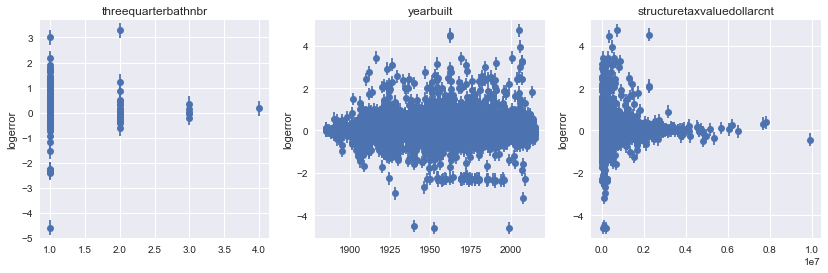

In [88]:
plt.figure(figsize=(14, 4))
plt.subplot(131)
x_axis =df_f1.filter(['threequarterbathnbr'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('threequarterbathnbr')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(132)
x_axis =df_f1.filter(['yearbuilt'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('yearbuilt')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.subplot(133)
x_axis =df_f1.filter(['structuretaxvaluedollarcnt'])
plt.errorbar(x_axis.values, y.values,  0.3, fmt='o')
plt.title('structuretaxvaluedollarcnt')
plt.ylabel('logerror')
#plt.xlim(-1, 13)

plt.show()